## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
ecomm_data = pd.read_csv("cleaned_ecommerce_dataset.csv")

In [3]:
ecomm_data.shape

(2685, 11)

In [4]:
ecomm_data.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [5]:
ecomm_data.describe()

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
count,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000
mean,4673.237616,58812.687151,3.705028,3.908007,43.478585,83.091650,19.456983
std,3517.893437,37013.726118,1.346240,0.289069,26.630426,42.227558,11.397281
min,4.000000,10100.000000,1.000000,3.000000,0.000000,12.000000,0.000000
25%,1310.000000,22000.000000,3.000000,4.000000,21.000000,49.000000,9.000000
50%,4666.000000,52800.000000,4.000000,4.000000,42.000000,73.650000,19.000000
75%,7651.000000,91000.000000,5.000000,4.000000,67.000000,129.820000,28.000000
max,10779.000000,123199.000000,5.000000,4.000000,88.000000,149.000000,39.000000


In [6]:
ecomm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [7]:
ecomm_data.dtypes

userId           int64
timestamp        int64
review          object
item            object
rating         float64
helpfulness    float64
gender          object
category        object
item_id          int64
item_price     float64
user_city        int64
dtype: object

In [8]:
ecomm_data = ecomm_data[['review','rating','helpfulness','gender','category']]
ecomm_data.head()

,review,rating,helpfulness,gender,category
0,Not always McCrap,4.0,3.0,M,Restaurants & Gourmet
1,I dropped the chalupa even before he told me to,1.0,4.0,M,Restaurants & Gourmet
2,The Wonderful World of Wendy,5.0,4.0,M,Restaurants & Gourmet
3,They actually did it,5.0,3.0,M,Movies
4,Hey! Gimme some pie!,3.0,3.0,M,Movies


In [9]:
ecomm_data.dtypes

review          object
rating         float64
helpfulness    float64
gender          object
category        object
dtype: object

In [10]:
ecomm_data.isna()

,review,rating,helpfulness,gender,category
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2680,False,False,False,False,False
2681,False,False,False,False,False
2682,False,False,False,False,False
2683,False,False,False,False,False


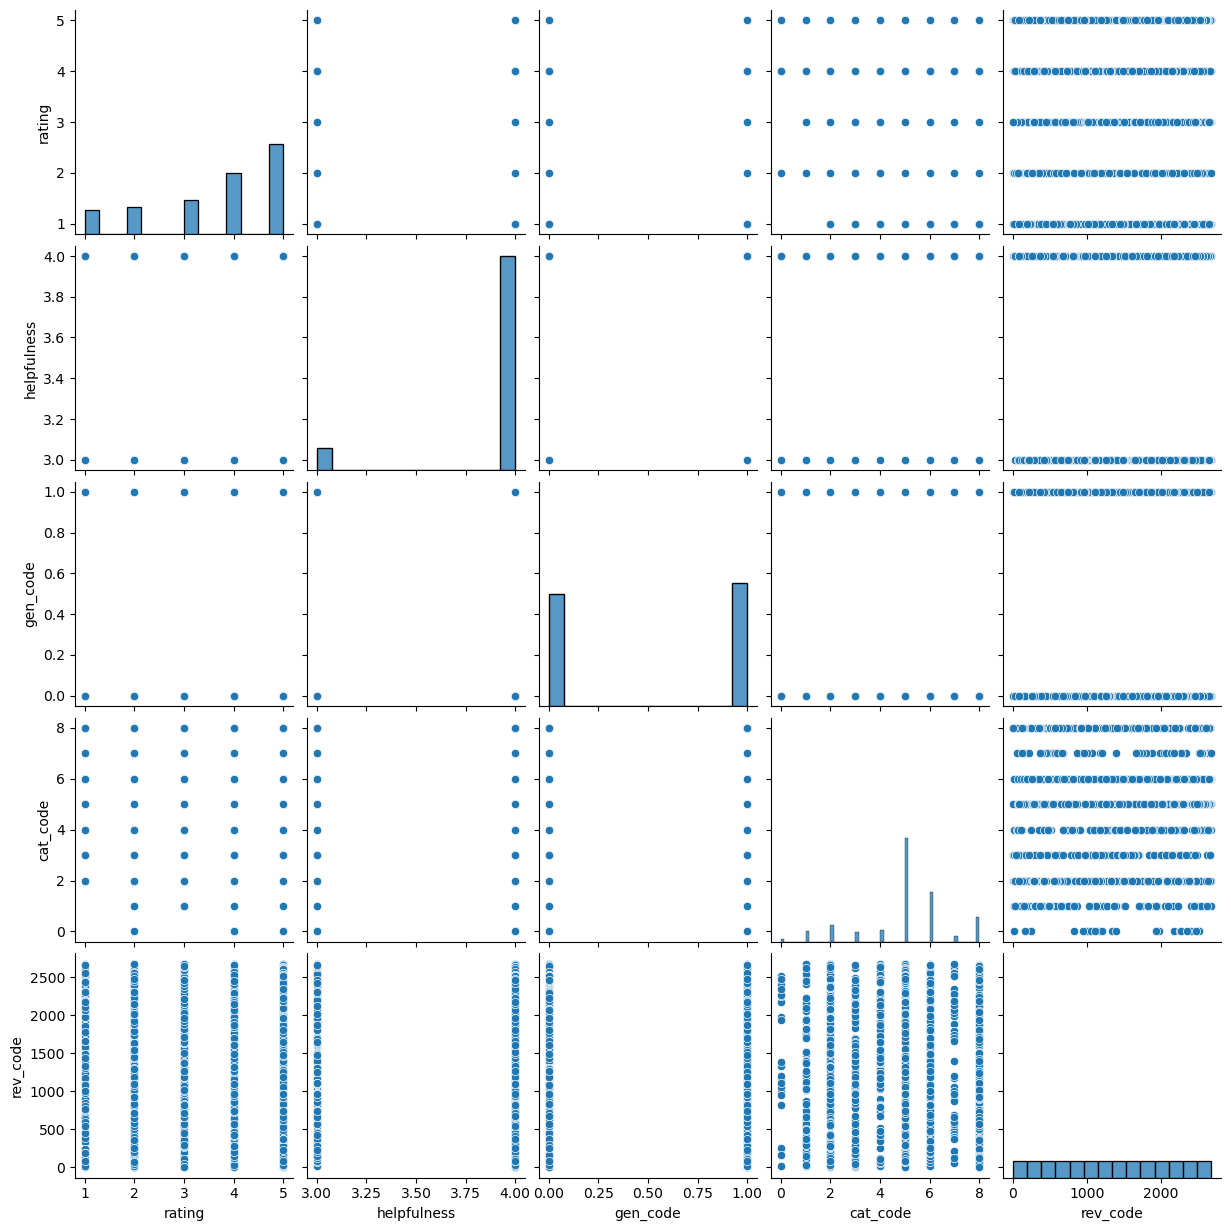

In [43]:
sns.pairplot(ecomm_data)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
ord_enc = OrdinalEncoder()
ecomm_data["gen_code"] = ord_enc.fit_transform(ecomm_data[["gender"]])

In [13]:
ecomm_data.dtypes

review          object
rating         float64
helpfulness    float64
gender          object
category        object
gen_code       float64
dtype: object

In [14]:
ord_enc = OrdinalEncoder()
ecomm_data["cat_code"] = ord_enc.fit_transform(ecomm_data[["category"]])

In [15]:
ecomm_data.dtypes

review          object
rating         float64
helpfulness    float64
gender          object
category        object
gen_code       float64
cat_code       float64
dtype: object

In [16]:
ord_enc = OrdinalEncoder()
ecomm_data["rev_code"] = ord_enc.fit_transform(ecomm_data[["review"]])

In [17]:
ecomm_data.dtypes

review          object
rating         float64
helpfulness    float64
gender          object
category        object
gen_code       float64
cat_code       float64
rev_code       float64
dtype: object

In [18]:
ecomm_data.corr(method ='pearson')

C:\Users\abina\AppData\Local\Temp\ipykernel_11408\72623997.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ecomm_data.corr(method ='pearson')


,rating,helpfulness,gen_code,cat_code,rev_code
rating,1.000000,-0.007523,-0.034337,-0.163158,-0.036118
helpfulness,-0.007523,1.000000,0.075947,-0.013408,-0.028259
gen_code,-0.034337,0.075947,1.000000,0.022549,-0.037884
cat_code,-0.163158,-0.013408,0.022549,1.000000,0.001970
rev_code,-0.036118,-0.028259,-0.037884,0.001970,1.000000


The Pearson Correlation factor depicts the strength of relationship between two different parameters and ranges between -1 and 1. The negative coefficients describe a negative relationship between the 2 parameters while the positive coefficients describe a positive relationship between the 2 parameters.The relationship strengths are binned as follows:

- 0 to 0.2, 0 to -0.2 as low.
- 0.2 to 0.5, -0.2 to -0.5 as medium.
- 0.5 to 0.8, -0.5 to -0.8 as high.
- 0.8 to 1.0. -0.8 to -1.0 as very high

From the above mentioned strengths we can see that category is the all parameters are weakly related to rating. The strength of correlation decreases in the following order - Category, review, gender, helpfulness.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [59]:
#Case 1 where train dataset consists of 10% of the data
train, test = train_test_split(ecomm_data, train_size=0.1, random_state=142)
print(train.shape)
print(test.shape)

(268, 8)
(2417, 8)


In [60]:
#Case 2 where train dataset consists of 90% of the data
train, test = train_test_split(ecomm_data, train_size=0.9, random_state=142)
print(train.shape)
print(test.shape)

(2416, 8)
(269, 8)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [61]:
highcorr = ecomm_data[['rating','cat_code','rev_code']]
lowcorr = ecomm_data[['rating','helpfulness','gen_code']]

In [62]:
#model A
train, test = train_test_split(highcorr, train_size=0.1)
print(train.shape)
print(test.shape)

(268, 3)
(2417, 3)


In [63]:
reg = linear_model.LinearRegression()
X = train[['cat_code', 'rev_code']]
y = train['rating']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.1047932  -0.00015504] + 4.4916850353799145


In [64]:
predicted = reg.predict(X)
mse1 = ((np.array(y) - predicted)**2).sum()/len(y)
r2_1 = r2_score(y,predicted)
print("Training MSE Model A:", mse1)
print("Training R Squared Model A:", r2_1)

Training MSE Model A: 1.7748669331785987
Training R Squared Model A: 0.02816117305050103


In [65]:
X = test[['cat_code','rev_code']]
y = test['rating']
predicted = reg.predict(X)
mse2 = ((np.array(y) - predicted)**2).sum()/len(y)
r2_2 = r2_score(y,predicted)
print("Test MSE Model A:", mse2)
print("Test R Squared Model A:", r2_2)

Test MSE Model A: 1.770025459901507
Test R Squared Model A: 0.021711314987322927


In [66]:
#model B
train, test = train_test_split(lowcorr, train_size=0.1)
print(train.shape)
print(test.shape)

(268, 3)
(2417, 3)


In [67]:
reg = linear_model.LinearRegression()
X = train[['helpfulness', 'gen_code']]
y = train['rating']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [0.46299431 0.12771112] + 1.7802392924113424


In [68]:
predicted = reg.predict(X)
mse3 = ((np.array(y) - predicted)**2).sum()/len(y)
r2_3 = r2_score(y,predicted)
print("Training MSE Model B:", mse3)
print("Training R Squared Model B:", r2_3)

Training MSE Model B: 1.7854993403074735
Training R Squared Model B: 0.011540827212758287


In [69]:
X = test[['helpfulness','gen_code']]
y = test['rating']
predicted = reg.predict(X)
mse4 = ((np.array(y) - predicted)**2).sum()/len(y)
r2_4 = r2_score(y,predicted)
print("Test MSE Model B:", mse4)
print("Test R Squared Model B:", r2_4)

Test MSE Model B: 1.8526130392841638
Test R Squared Model B: -0.022393371389422656


In [70]:
#model C
train, test = train_test_split(highcorr, train_size=0.9)
print(train.shape)
print(test.shape)

(2416, 3)
(269, 3)


In [71]:
reg = linear_model.LinearRegression()
X = train[['cat_code', 'rev_code']]
y = train['rating']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-1.25102052e-01 -8.28372941e-05] + 4.432493893717317


In [72]:
predicted = reg.predict(X)
mse5 = ((np.array(y) - predicted)**2).sum()/len(y)
r2_5 = r2_score(y,predicted)
print("Training MSE Model C:", mse5)
print("Training R Squared Model C:", r2_5)

Training MSE Model C: 1.7639960967310826
Training R Squared Model C: 0.02880530495555289


In [73]:
X = test[['cat_code','rev_code']]
y = test['rating']
predicted = reg.predict(X)
mse6 = ((np.array(y) - predicted)**2).sum()/len(y)
r2_6 = r2_score(y,predicted)
print("Test MSE Model C:", mse6)
print("Test R Squared Model C:", r2_6)

Test MSE Model C: 1.738895197658183
Test R Squared Model C: 0.014441730389249008


In [74]:
#model D
train, test = train_test_split(lowcorr, train_size=0.9)
print(train.shape)
print(test.shape)

(2416, 3)
(269, 3)


In [75]:
reg = linear_model.LinearRegression()
X = train[['helpfulness', 'gen_code']]
y = train['rating']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [ 0.0307849  -0.06210592] + 3.6265052127451285


In [76]:
predicted = reg.predict(X)
mse7 = ((np.array(y) - predicted)**2).sum()/len(y)
r2_7 = r2_score(y,predicted)
print("Training MSE Model D:", mse7)
print("Training R Squared Model D:", r2_7)

Training MSE Model D: 1.7967488235485358
Training R Squared Model D: 0.0005576268348087554


In [77]:
X = test[['helpfulness','gen_code']]
y = test['rating']
predicted = reg.predict(X)
mse8 = ((np.array(y) - predicted)**2).sum()/len(y)
r2_8 = r2_score(y,predicted)
print("Test MSE Model D:", mse8)
print("Test R Squared Model D:", r2_8)

Test MSE Model D: 1.9298706996536081
Test R Squared Model D: -0.00011010153571344716


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [78]:
print('Train MSE score model A:', mse1)
print('Test MSE Score model A:', mse2)
print('Train MSE score model B:', mse3)
print('Test MSE Score model B:', mse4)
print('Train MSE score model C:', mse5)
print('Test MSE Score model C:', mse6)
print('Train MSE score model D:', mse7)
print('Test MSE Score model D:', mse8)

Train MSE score model A: 1.7748669331785987
Test MSE Score model A: 1.770025459901507
Train MSE score model B: 1.7854993403074735
Test MSE Score model B: 1.8526130392841638
Train MSE score model C: 1.7639960967310826
Test MSE Score model C: 1.738895197658183
Train MSE score model D: 1.7967488235485358
Test MSE Score model D: 1.9298706996536081


In [79]:
print('Train RMSE score model A:', mse1**0.5 )
print('Test RMSE Score model A:', mse2**0.5)
print('Train RMSE score model B:', mse3**0.5 )
print('Test RMSE Score model B:', mse4**0.5)
print('Train RMSE score model C:', mse5**0.5 )
print('Test RMSE Score model C:', mse6**0.5)
print('Train RMSE score model D:', mse7**0.5 )
print('Test RMSE Score model D:', mse8**0.5)

Train RMSE score model A: 1.3322413194232487
Test RMSE Score model A: 1.3304230379475195
Train RMSE score model B: 1.336225781934877
Test RMSE Score model B: 1.3611072842668075
Train RMSE score model C: 1.3281551478389422
Test RMSE Score model C: 1.3186717550847076
Train RMSE score model D: 1.3404285969601424
Test RMSE Score model D: 1.389197861952576


In [80]:
data = {'Model': ['A', 'B', 'C', 'D'],
        'Train MSE': [mse1, mse3, mse5, mse7],
        'Test MSE' : [mse2, mse4, mse6, mse8],
        'Train RMSE' : [mse1**0.5, mse3**0.5, mse5**0.5, mse7**0.5],
        'Test RMSE' : [mse2**0.5, mse4**0.5, mse6**0.5, mse8**0.5],
        'Train R2' : [r2_1,r2_3,r2_5,r2_7],
        'Test R2' : [r2_2,r2_4,r2_6,r2_8]}
Eval = pd.DataFrame(data)

In [81]:
Eval.head()

,Model,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
0,A,1.774867,1.770025,1.332241,1.330423,0.028161,0.021711
1,B,1.785499,1.852613,1.336226,1.361107,0.011541,-0.022393
2,C,1.763996,1.738895,1.328155,1.318672,0.028805,0.014442
3,D,1.796749,1.929871,1.340429,1.389198,0.000558,-0.000110


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

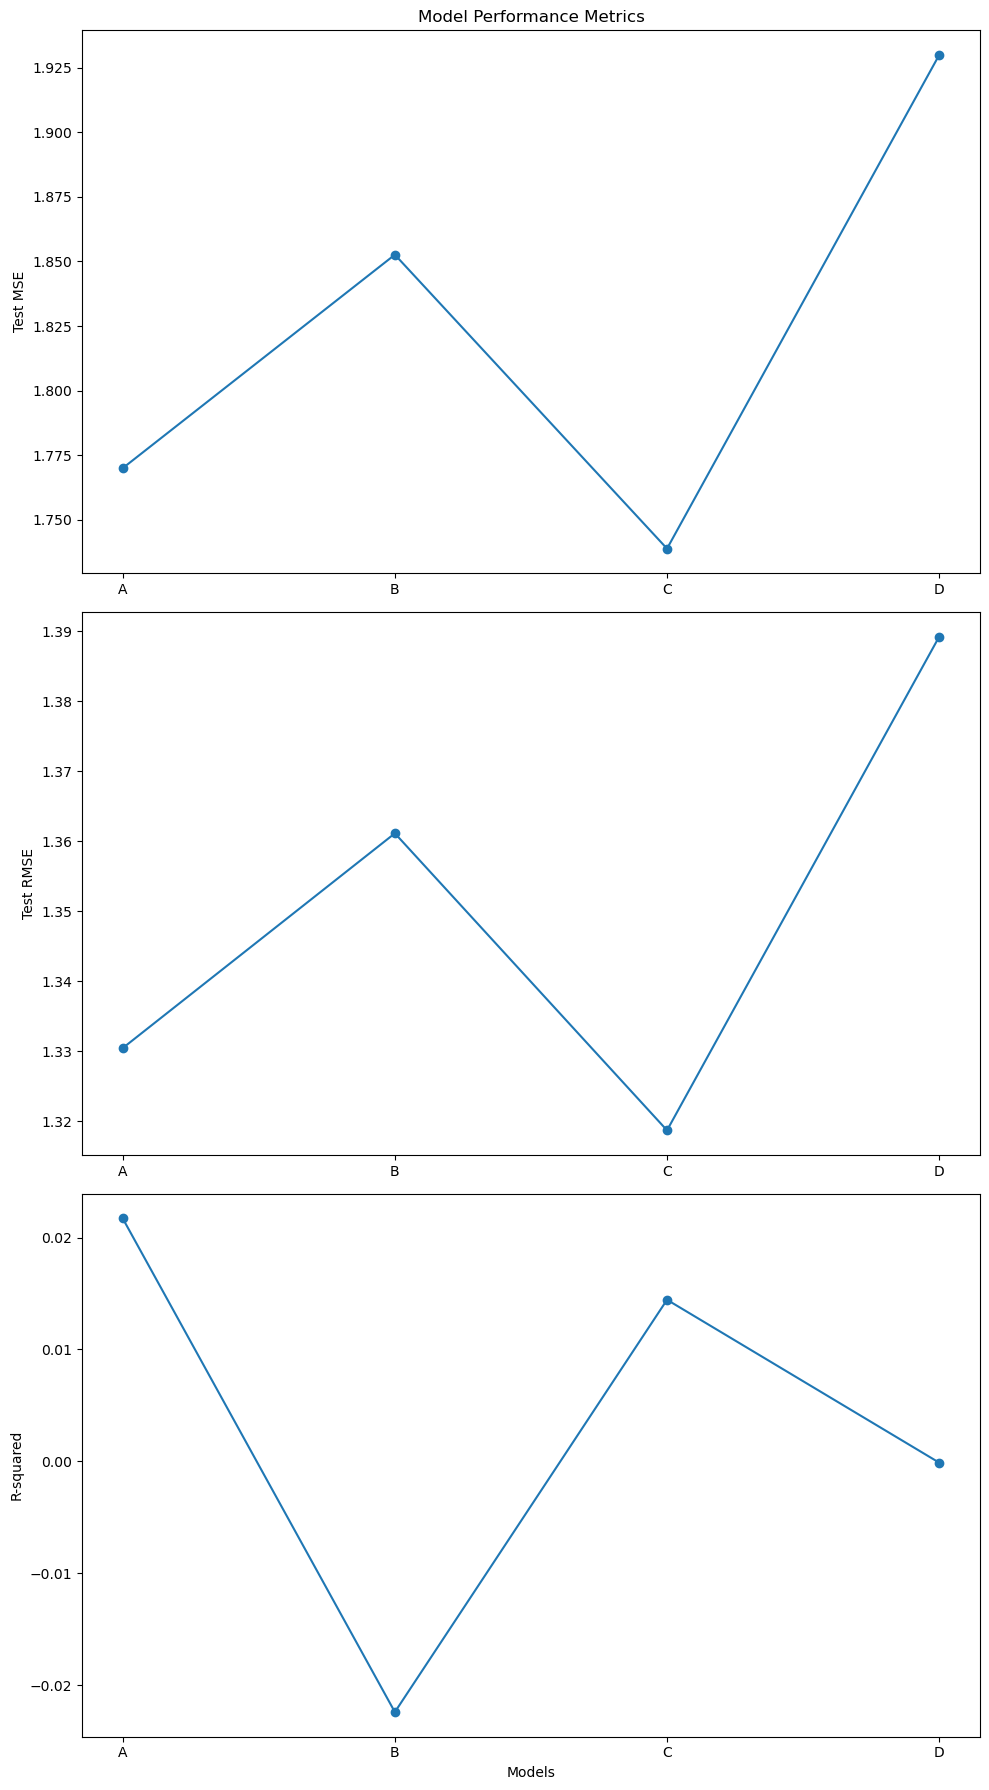

In [82]:
plt.figure(figsize=(10, 18))

# Subplot 1: MSE
plt.subplot(3, 1, 1)
plt.plot(Eval['Model'], Eval['Test MSE'], marker='o')
plt.ylabel('Test MSE')
plt.title('Model Performance Metrics')

# Subplot 2: RMSE
plt.subplot(3, 1, 2)
plt.plot(Eval['Model'], Eval['Test RMSE'], marker='o')
plt.ylabel('Test RMSE')

# Subplot 3: R-squared
plt.subplot(3, 1, 3)
plt.plot(Eval['Model'], Eval['Test R2'], marker='o')
plt.ylabel('R-squared')
plt.xlabel('Models')

plt.tight_layout()
plt.show()

## Summary

- According to our hypothesis the model with highest training data and most correlated parameters which is Model C should have the least MSE value and the least RMSE value. Showing us that the model predicts the best values. The graph above confirms the same as the MSE value for Model C is the least.
- The MSE and RMSE graphs have the same pattern as RMSE is just the root of the respective models MSE value
- Low test MSE and train MSE shows that the model fits perfectly which is seen in Model A. In model B, model D Test MSE > Train MSE showing us that the model overfits.
- Since Model C has the best R squared value(Test R2). Model C fits best.  